# Address the following questions. For each question, explain why you chose the approach you did.

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html
raw = pd.read_csv('ESS.csv')
print(raw.shape)
print(raw.dtypes)
raw.head()

(8594, 13)
cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 839.3+ KB


In [4]:
raw['year'] = np.where(raw.year==6,2012,2014)
raw.groupby('year')['idno'].agg('count')

year
2012    4297
2014    4297
Name: idno, dtype: int64

In [5]:
raw.groupby('cntry')['idno'].agg('count')

cntry
CH    1546
CZ    1316
DE      28
ES    2426
NO    1462
SE    1816
Name: idno, dtype: int64

In [6]:
countries = {'CH': 'Switzerland',
             'CZ': 'Czech Republic',
             'DE': 'Germany',
             'ES': 'Spain',
             'NO': 'Norway',
             'SE': 'Sweden'}

In [26]:
#Checks distribution:

def checkdist(series, bins=False):
    #input s/b pandas series
    fig = plt.figure(figsize=[15,5])
    fig.add_subplot(121)
    if bins:
        plt.hist(series, bins=bins)
    else:
        plt.hist(series)
    plt.axvline(np.mean(series), linestyle='dashed', color='black')
    plt.title('Distribution')
    fig.add_subplot(122)
    norm = np.random.normal(size=len(series))
    norm.sort()
    series = series.sort_values()
    plt.title('QQ plot')
    plt.plot(series, norm, "o") 
    plt.show() 

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

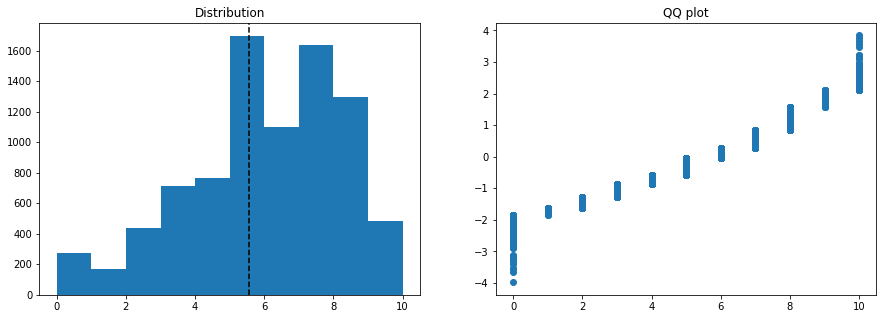

In [27]:
#Check overall dataset
checkdist(raw[raw.ppltrst.notnull()]['ppltrst'])

In [9]:
#Define a df for this trust question with nans dropped
trst = raw.dropna(subset=['ppltrst'])
print(trst.shape)

(8580, 13)


In [16]:
#If we suppose that is a "Normal" distribution:

In [37]:
for c, name in countries.items():
    F, p = stats.f_oneway(
    trst[(trst.cntry==c) & (trst.year==2012)]['ppltrst'],
    trst[(trst.cntry==c) & (trst.year==2014)]['ppltrst'])
    print('\n',name)
    print('f-statistic: ',F)
    print('p-value: ',p)


 Switzerland
f-statistic:  0.4600524426784201
p-value:  0.49770110247170185

 Czech Republic
f-statistic:  0.22709448291597525
p-value:  0.6337663626855166

 Germany
f-statistic:  0.03270440251572326
p-value:  0.8578926631223294

 Spain
f-statistic:  6.221415341840899
p-value:  0.012687599930346013

 Norway
f-statistic:  0.2956825356381541
p-value:  0.586684963598745

 Sweden
f-statistic:  4.364609741762067
p-value:  0.036832086995183345


In [ ]:
#If we do not accept that that is a normal distribution:

In [10]:
for c, name in countries.items():
    yr1 = trst[(trst.cntry == c) & (trst.year==2012)]['ppltrst']
    yr2 = trst[(trst.cntry == c) & (trst.year==2014)]['ppltrst']
    print(name, len(yr1), ' samples')
    print('2012 mean: ', np.mean(yr1), '\n2014 mean: ', np.mean(yr2),)
    print(stats.kruskal(yr1,yr2), '\n')

Switzerland 773  samples
2012 mean:  5.677878395860285 
2014 mean:  5.751617076326003
KruskalResult(statistic=0.3016359964448019, pvalue=0.5828586111442048) 

Czech Republic 651  samples
2012 mean:  4.362519201228879 
2014 mean:  4.424657534246576
KruskalResult(statistic=0.7211591385301228, pvalue=0.39576395374563544) 

Germany 14  samples
2012 mean:  5.214285714285714 
2014 mean:  5.357142857142857
KruskalResult(statistic=0.03493591039585809, pvalue=0.8517300191250199) 

Spain 1213  samples
2012 mean:  5.114591920857379 
2014 mean:  4.895127993393889
KruskalResult(statistic=8.216087354735361, pvalue=0.0041520627675982) 

Norway 730  samples
2012 mean:  6.64931506849315 
2014 mean:  6.598630136986301
KruskalResult(statistic=0.244738742531337, pvalue=0.6208043004969865) 

Sweden 906  samples
2012 mean:  6.058498896247241 
2014 mean:  6.257709251101321
KruskalResult(statistic=4.241254711044051, pvalue=0.03945299959307013) 



Regardless of which method you use, Spain appears to have become less trustful from 2012 to 2014, while Sweden appears to have become more trustful. None of the other countries made changes we can be confident about.

# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [11]:
#Define a df for this trust quesiont with nans dropped
hpy = raw.dropna(subset=['happy'])
print(hpy.shape)

(8563, 13)


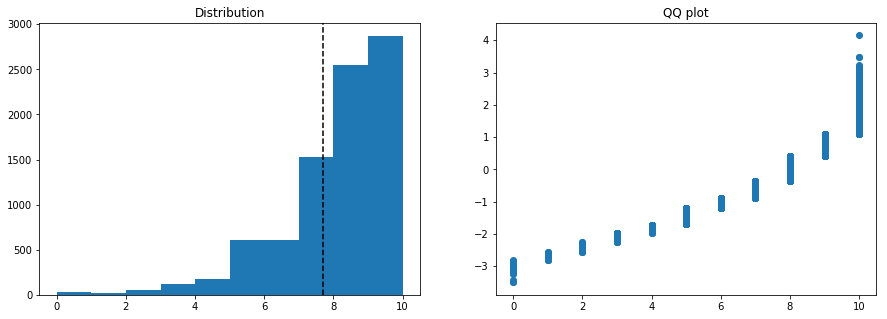

In [28]:
checkdist(hpy.happy)

In [13]:
for c, name in countries.items():
    yr1 = hpy[(hpy.cntry == c) & (hpy.year==2012)]['happy']
    yr2 = hpy[(hpy.cntry == c) & (hpy.year==2014)]['happy']
    print(name, len(yr1), ' samples')
    print('2012 mean: ', np.mean(yr1), '\n2014 mean: ', np.mean(yr2),)
    print(stats.kruskal(yr1,yr2), '\n')

Switzerland 770  samples
2012 mean:  8.088311688311688 
2014 mean:  8.116429495472186
KruskalResult(statistic=0.22331955287588717, pvalue=0.6365221432042547) 

Czech Republic 646  samples
2012 mean:  6.7708978328173375 
2014 mean:  6.914110429447852
KruskalResult(statistic=1.4258218687180508, pvalue=0.23244752383800354) 

Germany 14  samples
2012 mean:  7.428571428571429 
2014 mean:  7.857142857142857
KruskalResult(statistic=0.39056749122656015, pvalue=0.532001255058662) 

Spain 1212  samples
2012 mean:  7.548679867986799 
2014 mean:  7.41996699669967
KruskalResult(statistic=4.089203641177268, pvalue=0.04315797189625085) 

Norway 727  samples
2012 mean:  8.25171939477304 
2014 mean:  7.9151846785225715
KruskalResult(statistic=19.139561932891844, pvalue=1.215001301639077e-05) 

Sweden 907  samples
2012 mean:  7.907386990077177 
2014 mean:  7.946961325966851
KruskalResult(statistic=0.05045734520052835, pvalue=0.8222693615371405) 



None of these countries can be proven to have gotten happier from 2012 to 2014

# Who reported watching more TV in 2012, men or women?

In [14]:
tv12 = raw[raw.year==2012].dropna(subset=['tvtot'])
tv12.shape

(4291, 13)

Men:


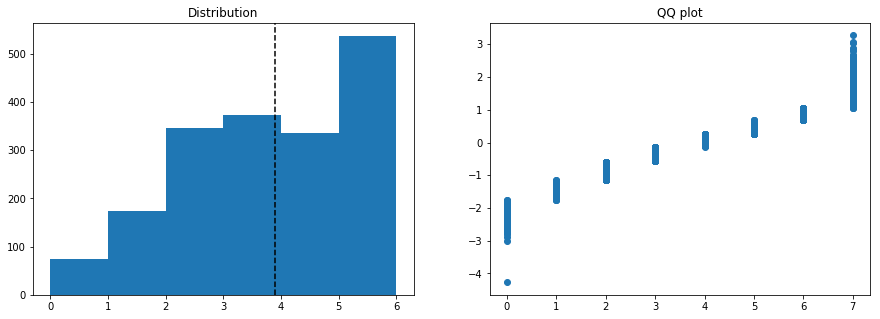

Women:


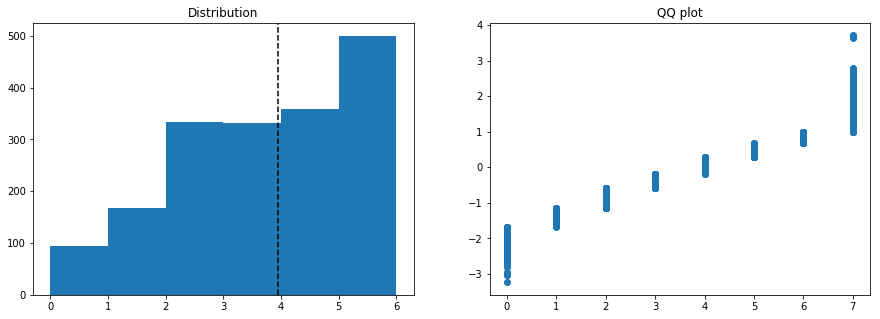

In [29]:
print("Men:")
checkdist(tv12[tv12.gndr==1]['tvtot'], bins=[x for x in range(0,7)])
print("Women:")
checkdist(tv12[tv12.gndr==2]['tvtot'], bins=[x for x in range(0,7)])

In [33]:
mentv = tv12[tv12.gndr==1]['tvtot']
womentv = tv12[tv12.gndr==2]['tvtot']
print('Men Mean: ', np.mean(mentv))
print('Women Mean: ', np.mean(womentv))
print(stats.kruskal(mentv, womentv))

Men Mean:  3.901906090190609
Women Mean:  3.944392523364486
KruskalResult(statistic=0.5766091020549451, pvalue=0.447644522500795)


There is no indication that one sex watched more TV than the other in 2012.

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [38]:
fair12 = raw[raw.year==2012].dropna(subset=['pplfair','partner'])
print(fair12.shape)

(4271, 13)


Lives with partner:


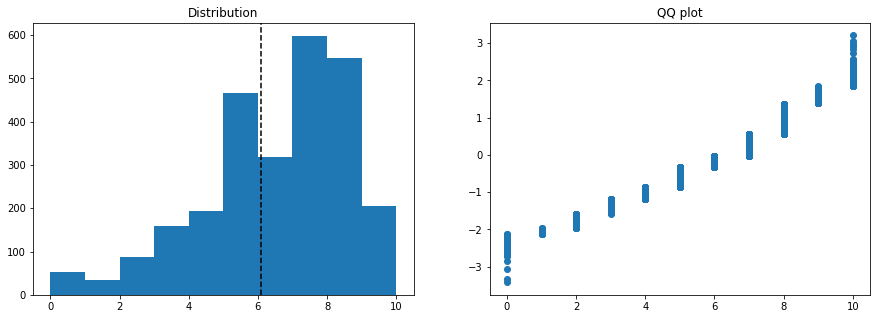

Does not live with partner:


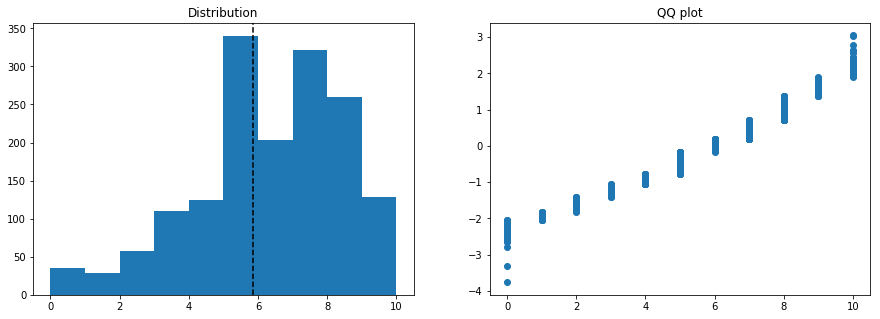

In [39]:
print("Lives with partner:")
checkdist(fair12[fair12.partner==1]['pplfair'])
print("Does not live with partner:")
checkdist(fair12[fair12.partner==2]['pplfair'])

In [40]:
print("Lives with partner Mean:")
print(np.mean(fair12[fair12.partner==1]['pplfair']))
print("Does not live with partner:")
print(np.mean(fair12[fair12.partner==2]['pplfair']))
F, p = stats.f_oneway(
    fair12[fair12.partner==1]['pplfair'],
    fair12[fair12.partner==2]['pplfair'])
print('f-statistic: ',F)
print('p-value: ',p)

Lives with partner Mean:
6.080736012016523
Does not live with partner:
5.856965174129353
f-statistic:  11.023086567011378
p-value:  0.0009073952609876207


Those who live with a partner were demonstrably more likely to believe the world is fair, averaging ~6.1 compared to only 5.9 on self-reported ratings.

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [47]:
meets = raw.loc[raw['cntry'].isin(['DE','ES','CH'])]
meets = meets[meets.year == 2014].dropna(subset=['sclmeet'])
meets.shape

(1997, 13)

Germany


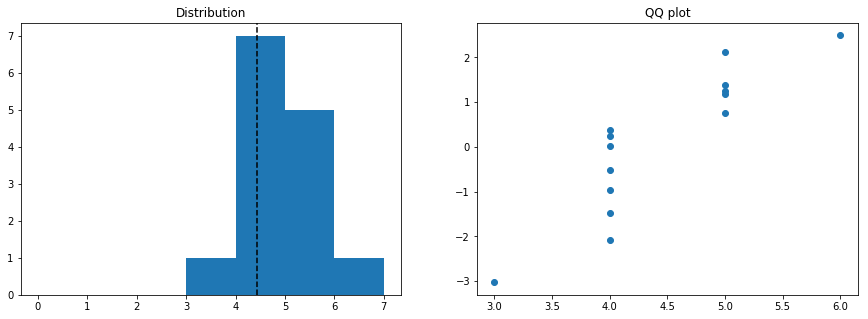

Spain


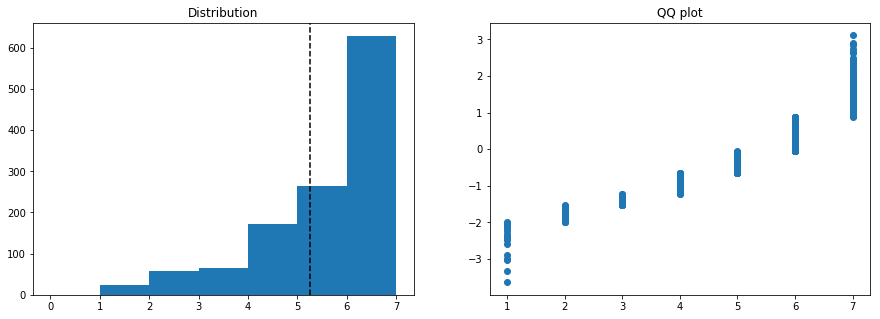

Switzerland


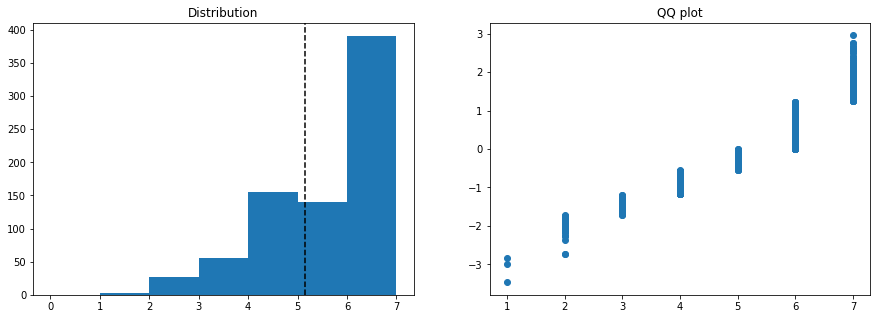

In [52]:
print(countries['DE'])
checkdist(meets[meets.cntry=='DE']['sclmeet'],
         bins=[x for x in range(8)])
print(countries['ES'])
checkdist(meets[meets.cntry=='ES']['sclmeet'],
          bins=[x for x in range(8)])
print(countries['CH'])
checkdist(meets[meets.cntry=='CH']['sclmeet'],
          bins=[x for x in range(8)])

In [53]:
for c in ['DE','ES','CH']:
    print(countries[c], ': ', 
          np.mean(meets[meets.cntry==c]['sclmeet']))

Germany :  4.428571428571429
Spain :  5.2601156069364166
Switzerland :  5.160621761658031


In [57]:
stats.kruskal(
    meets[meets.cntry=='DE']['sclmeet'],
    meets[meets.cntry=='CH']['sclmeet'])

KruskalResult(statistic=6.811209280804956, pvalue=0.009058739707675768)

In [58]:
stats.kruskal(
    meets[meets.cntry=='DE']['sclmeet'],
    meets[meets.cntry=='ES']['sclmeet'])

KruskalResult(statistic=8.48853020112894, pvalue=0.0035739241736939867)

In [59]:
stats.kruskal(
    meets[meets.cntry=='ES']['sclmeet'],
    meets[meets.cntry=='CH']['sclmeet'])

KruskalResult(statistic=6.260317221619147, pvalue=0.012347209292747114)

Both Spain and Switzerland are demonstrably more social than Germany. Additionally, Spain is more social than Switzerland.

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [69]:
acts = raw.loc[raw['cntry'].isin(['NO','ES','CH', 'SE'])]
acts = acts[acts.year == 2014].dropna(subset=['sclact'])
acts.shape

(3585, 13)

Norway


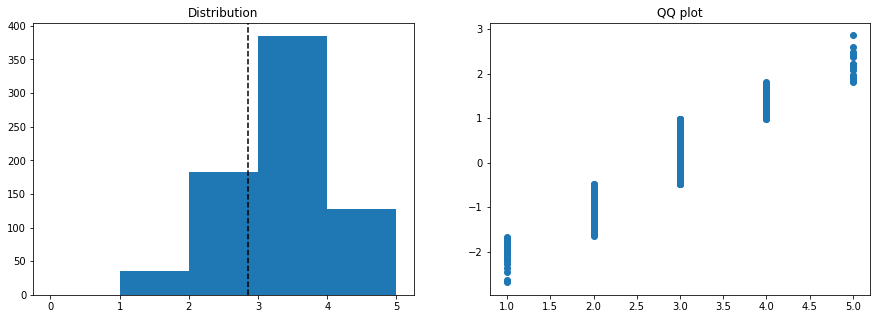

Spain


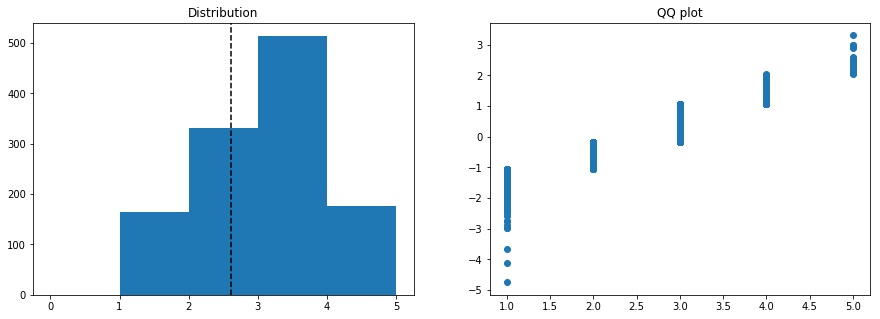

Switzerland


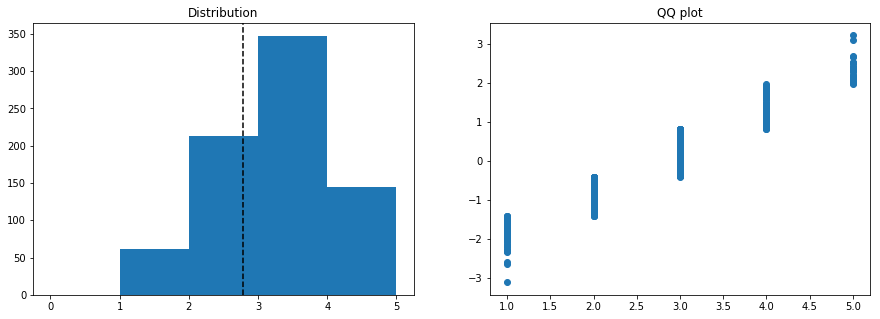

Sweden


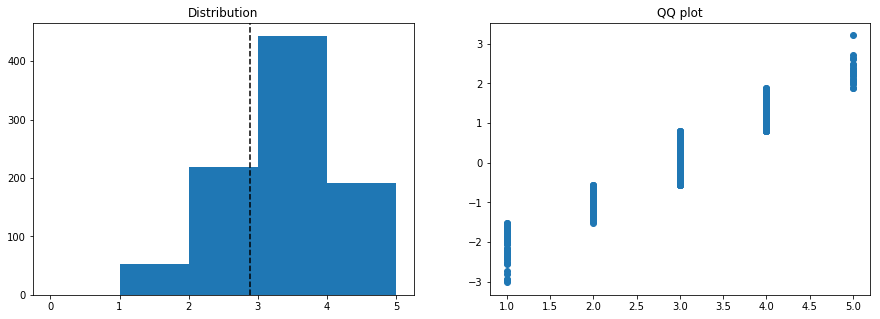

In [70]:
for c in ['NO','ES','CH', 'SE']:
    print(countries[c])
    checkdist(acts[acts.cntry==c]['sclact'],
             bins=range(6))

In [71]:
#These can pass for normal.

In [76]:
tukey = pairwise_tukeyhsd(endog=acts['sclact'],
            groups=acts['cntry'],alpha=0.05)

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
CH,ES,-0.1648,-0.2718,-0.0578,True
CH,NO,0.0774,-0.0419,0.1967,False
CH,SE,0.0977,-0.0156,0.2111,False
ES,NO,0.2422,0.1337,0.3507,True
ES,SE,0.2625,0.1607,0.3644,True
NO,SE,0.0203,-0.0944,0.1351,False


Conclusion: We can confirm that Spain is more socially active than Switzerland, Norway, and Sweden.